<a href="https://colab.research.google.com/github/saishri-05/DDOS-HEALTHCARE-PROJECT/blob/main/Copy_of_DDOS_Attack_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

# For ploting the graphs
import matplotlib.pyplot as plt
import seaborn as sns
import csv

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Machine learning Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# Machine learning model evaluation
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_curve, auc, confusion_matrix


from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

In [ ]:
df=pd.read_csv("/content/DDos.csv")

In [ ]:
df.head(3)

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN


In [ ]:
# Remove the spaces before the column names
df.columns = df.columns.str.strip()

In [ ]:
#Unique values in the Label target column

df.loc[:,'Label'].unique()

array(['BENIGN', 'DDoS', nan], dtype=object)

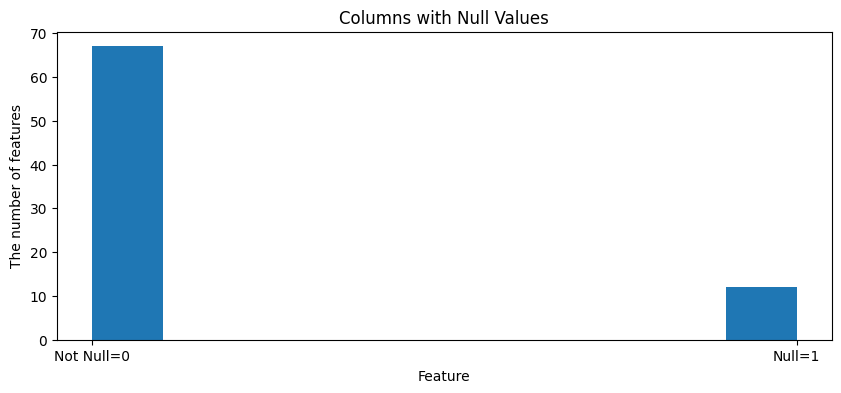

In [ ]:
#Checking the null values in the dataset.
plt.figure(1,figsize=( 10,4))
plt.hist( df.isna().sum())
# Set the title and axis labels
plt.xticks([0, 1], labels=['Not Null=0', 'Null=1'])
plt.title('Columns with Null Values')
plt.xlabel('Feature')
plt.ylabel('The number of features')

# Show the plot
plt.show()

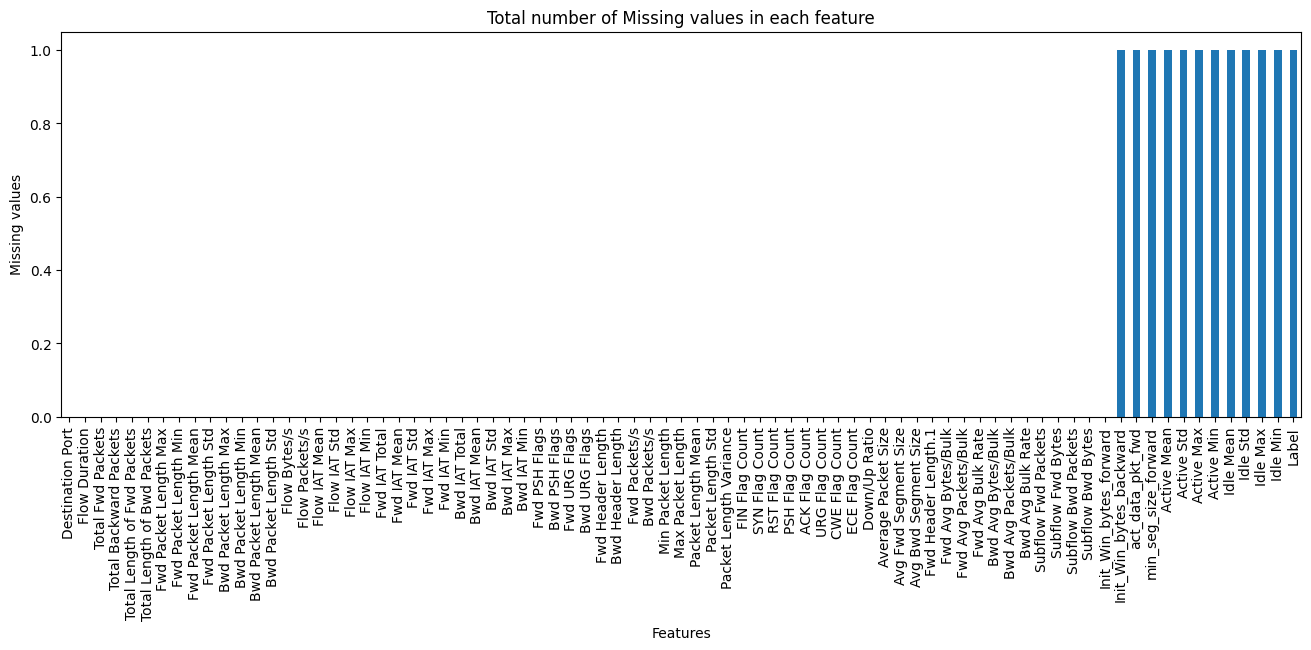

In [ ]:
def plotMissingValues(dataframe):
    missing_values = dataframe.isnull().sum()  # Counting null values for each column
    fig = plt.figure(figsize=(16, 5))
    missing_values.plot(kind='bar')
    plt.xlabel("Features")
    plt.ylabel("Missing values")
    plt.title("Total number of Missing values in each feature")
    plt.show()

plotMissingValues(df)

In [ ]:
## Removing the null values
data_f=df.dropna()

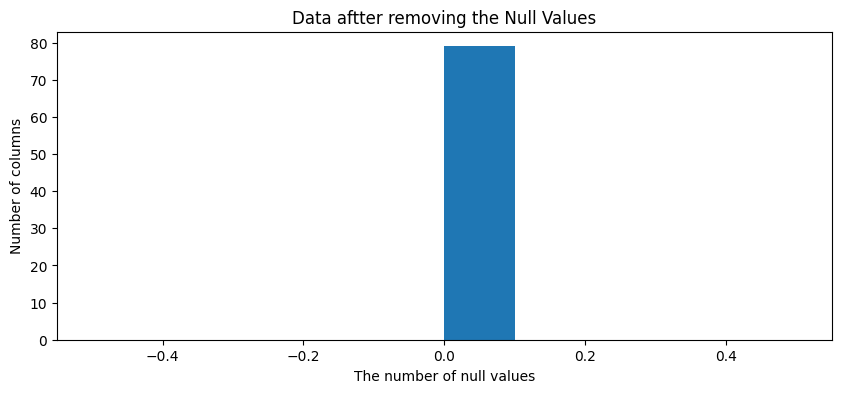

In [ ]:
#Checking the null values in the dataset.
plt.figure(1,figsize=( 10,4))
plt.hist( data_f.isna().sum())
# Set the title and axis labels
plt.title('Data aftter removing the Null Values')
plt.xlabel('The number of null values')
plt.ylabel('Number of columns')

# Show the plot
plt.show()

In [ ]:
pd.set_option('use_inf_as_na', True)  # Treat inf as NaN
null_values=data_f.isnull().sum()  # Check for NaN values

<ipython-input-10-23bf30ba4dd8>:1: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.set_option('use_inf_as_na', True)  # Treat inf as NaN


In [ ]:
# To know the data types of the columns

(data_f.dtypes=='object')

,0
Destination Port,False
Flow Duration,False
Total Fwd Packets,False
Total Backward Packets,False
Total Length of Fwd Packets,False
...,...
Idle Mean,False
Idle Std,False
Idle Max,False
Idle Min,False


In [ ]:
# Convert the labels in the DataFrame to numerical values
data_f['Label'] = data_f['Label'].map({'BENIGN': 0, 'DDoS': 1})

<ipython-input-12-4f96cf6dbfb9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_f['Label'] = data_f['Label'].map({'BENIGN': 0, 'DDoS': 1})


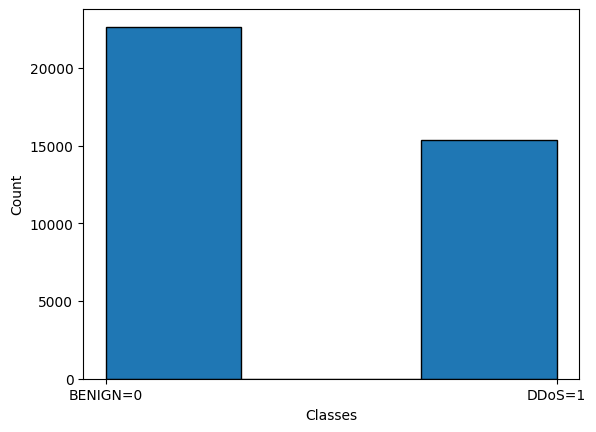

In [ ]:
# Print the DataFrame

plt.hist(data_f['Label'], bins=[0, 0.3,0.7,1], edgecolor='black')  # Specify bins as [0, 1]
plt.xticks([0, 1], labels=['BENIGN=0', 'DDoS=1'])
plt.xlabel("Classes")
plt.ylabel("Count")
plt.show()

In [ ]:
df.describe()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,38033.000000,3.803300e+04,38033.000000,38033.000000,38033.000000,3.803300e+04,38033.000000,38033.000000,38033.000000,38033.000000,...,38032.000000,38032.000000,3.803200e+04,3.803200e+04,3.803200e+04,3.803200e+04,3.803200e+04,3.803200e+04,3.803200e+04,3.803200e+04
mean,5398.398128,1.159394e+07,5.747088,5.738674,574.753425,7.215500e+03,228.101202,19.979518,72.303303,81.613157,...,3.779291,22.934897,1.239552e+05,2.886885e+04,1.750768e+05,1.071390e+05,5.909632e+06,1.490831e+06,6.968218e+06,4.829586e+06
std,15368.280584,2.709163e+07,21.401892,29.809338,3436.625231,5.227562e+04,994.484430,96.739056,282.909473,419.165410,...,16.569705,5.499697,8.928602e+05,3.839984e+05,1.144998e+06,8.495683e+05,1.554092e+07,7.369217e+06,1.818851e+07,1.437990e+07
min,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,53.000000,2.362700e+04,2.000000,1.000000,26.000000,6.000000e+00,6.000000,0.000000,6.000000,0.000000,...,1.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,80.000000,4.297890e+05,3.000000,2.000000,36.000000,1.940000e+02,20.000000,6.000000,8.666667,0.000000,...,2.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,389.000000,5.468297e+06,5.000000,5.000000,82.000000,1.160100e+04,45.000000,32.000000,42.000000,10.263203,...,3.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,61538.000000,1.199981e+08,1681.000000,2942.000000,120783.000000,4.991419e+06,11680.000000,1472.000000,3867.000000,6692.644993,...,1680.000000,52.000000,1.000000e+08,3.950000e+07,1.000000e+08,1.000000e+08,1.200000e+08,6.530000e+07,1.200000e+08,1.200000e+08


In [ ]:
# Convert into numpy array

#X1=np.array(data_f).astype(np.float64)
#y1=np.array(data_f['Label'])

In [ ]:
# Split data into features and target variable
X = data_f.drop('Label', axis=1)
y = data_f['Label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
print("The train dataset size = ",X_train.shape)
print("The test dataset size = ",X_test.shape)

The train dataset size =  (26622, 78)
The test dataset size =  (11410, 78)


In [ ]:
# Random Forest
rf_model = RandomForestClassifier(n_estimators=50, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

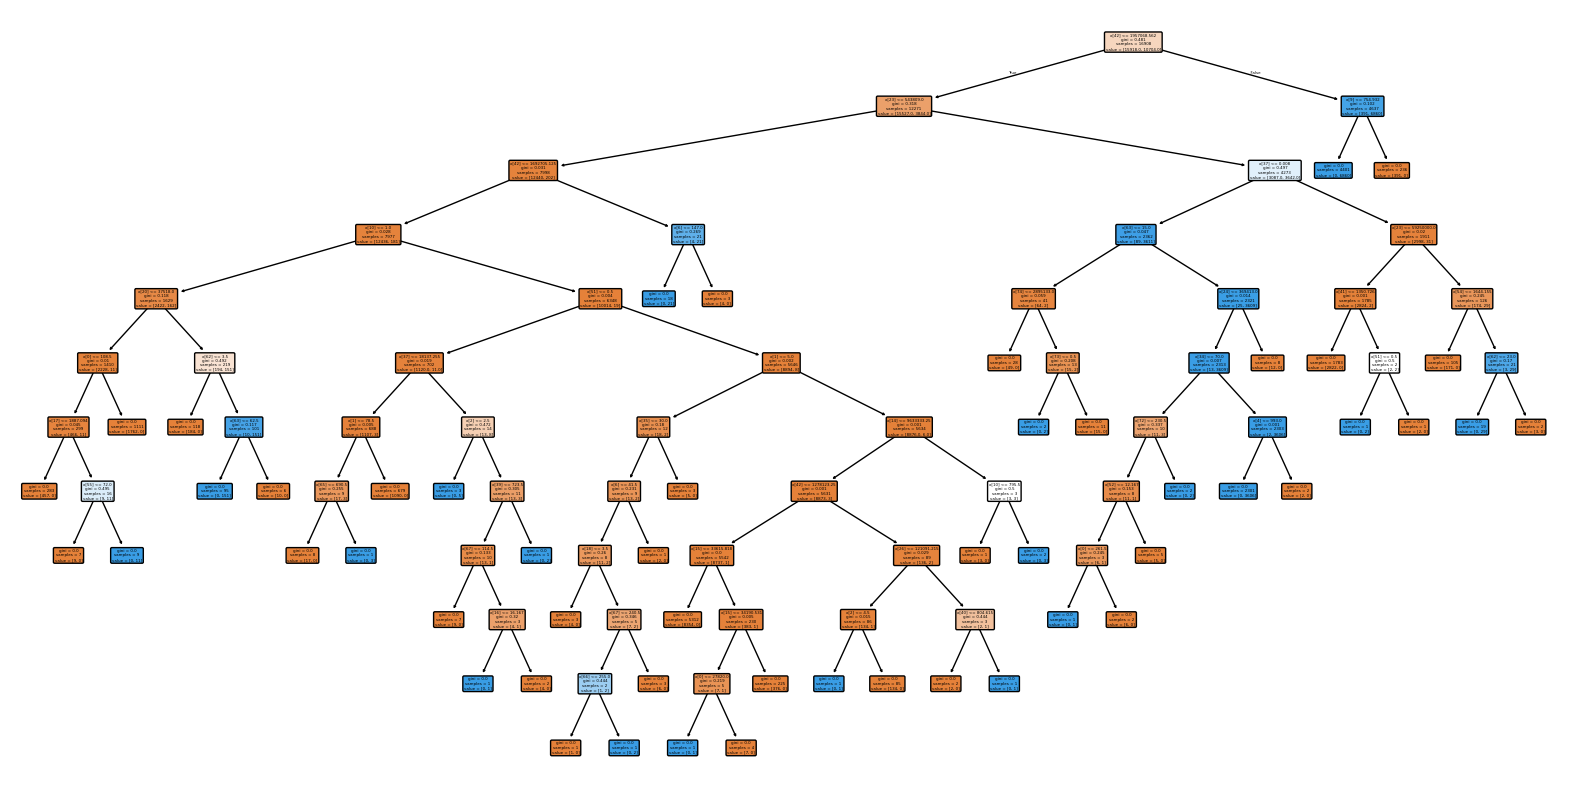

In [ ]:
from sklearn.tree import plot_tree

estimator = rf_model.estimators_[0]  # Selecting the first estimator from the random forest model


plt.figure(figsize=(20, 10))
plot_tree(estimator, filled=True, rounded=True)
plt.show()

In [ ]:
# Function to generate and display a detailed confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

In [ ]:
# Evaluate Random Forest
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)

print('\nRandom Forest Metrics:')
print(f'Accuracy: {rf_accuracy:.4f}')
print(f'F1 Score: {rf_f1:.4f}')
print(f'Precision: {rf_precision:.4f}')
print(f'Recall: {rf_recall:.4f}')


Random Forest Metrics:
Accuracy: 0.9998
F1 Score: 0.9998
Precision: 1.0000
Recall: 0.9996


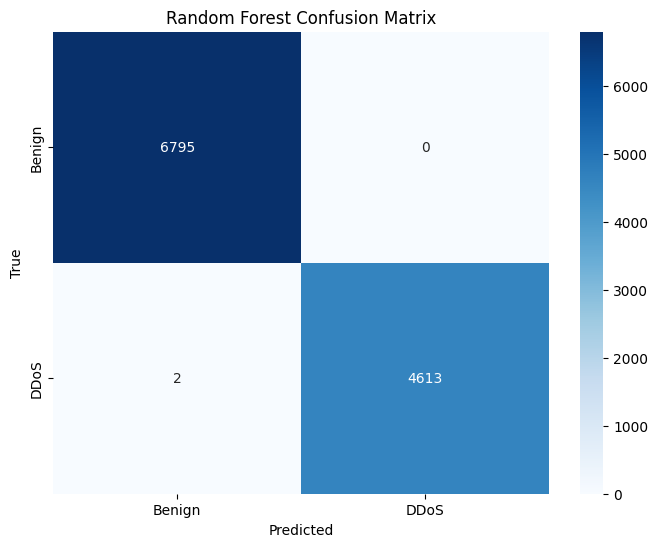

In [ ]:
# Confusion Matrix for Random Forest
plot_confusion_matrix(y_test, rf_pred, ['Benign', 'DDoS'], 'Random Forest Confusion Matrix')

In [ ]:
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
lr_accuracy = accuracy_score(y_test, lr_pred)
lr_f1 = f1_score(y_test, lr_pred)
lr_precision = precision_score(y_test, lr_pred)
lr_recall = recall_score(y_test, lr_pred)

In [ ]:
print('\nLogistic Regression Metrics:')
print(f'Accuracy: {lr_accuracy:.4f}')
print(f'F1 Score: {lr_f1:.4f}')
print(f'Precision: {lr_precision:.4f}')
print(f'Recall: {lr_recall:.4f}')


Logistic Regression Metrics:
Accuracy: 0.9507
F1 Score: 0.9421
Precision: 0.8971
Recall: 0.9918


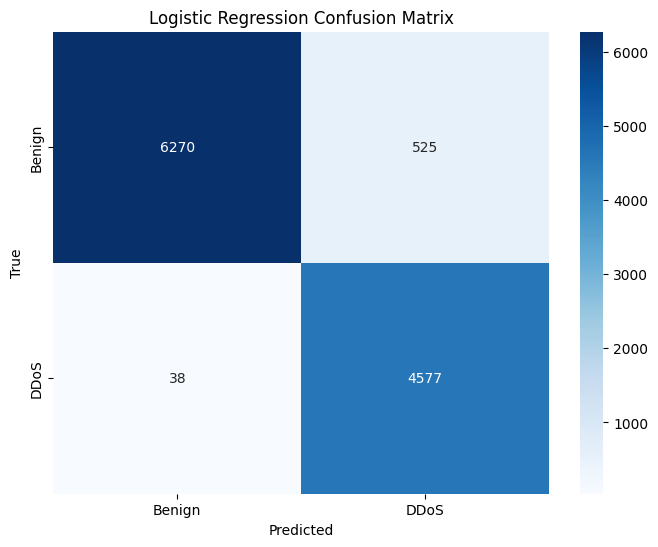

In [ ]:
# Confusion Matrix for Logistic Regression
plot_confusion_matrix(y_test, lr_pred, ['Benign', 'DDoS'], 'Logistic Regression Confusion Matrix')

In [ ]:
nn_model = MLPClassifier(hidden_layer_sizes=(10,), max_iter=10, random_state=42)
nn_model.fit(X_train, y_train)
nn_pred = nn_model.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
nn_accuracy = accuracy_score(y_test, nn_pred)
nn_f1 = f1_score(y_test, nn_pred)
nn_precision = precision_score(y_test, nn_pred)
nn_recall = recall_score(y_test, nn_pred)

print('\nNeural Network Metrics:')
print(f'Accuracy: {nn_accuracy:.4f}')
print(f'F1 Score: {nn_f1:.4f}')
print(f'Precision: {nn_precision:.4f}')
print(f'Recall: {nn_recall:.4f}')


Neural Network Metrics:
Accuracy: 0.9695
F1 Score: 0.9636
Precision: 0.9309
Recall: 0.9987


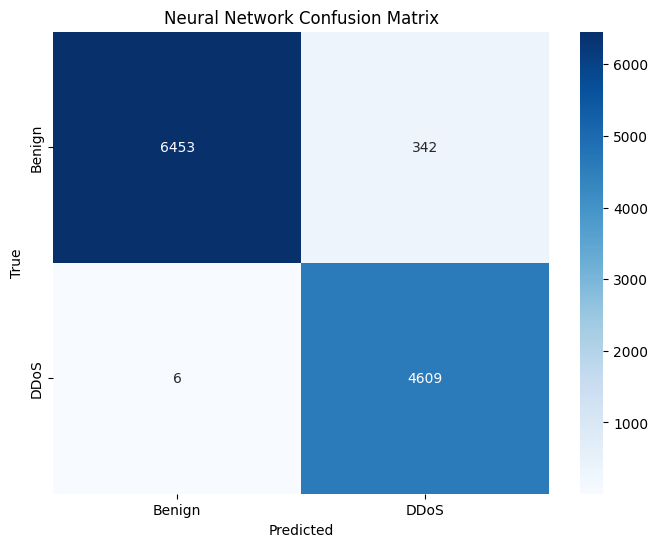

In [ ]:

# Confusion Matrix for Neural Network
plot_confusion_matrix(y_test, nn_pred, ['Benign', 'DDoS'], 'Neural Network Confusion Matrix')

In [ ]:
# Random Forest
rf_proba = rf_model.predict_proba(X_test)

# Logistic Regression
lr_proba = lr_model.predict_proba(X_test)



# Neural Network
nn_proba = nn_model.predict_proba(X_test)

In [ ]:
# Combine predictions for ROC curve



# Calculate ROC curve for Random Forest
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_proba[:, 1])
rf_auc = auc(rf_fpr, rf_tpr)

# Calculate ROC curve for Logistic Regression
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_proba[:, 1])
lr_auc = auc(lr_fpr, lr_tpr)



# Calculate ROC curve for Neural Network
nn_fpr, nn_tpr, _ = roc_curve(y_test, nn_proba[:, 1])
nn_auc = auc(nn_fpr, nn_tpr)

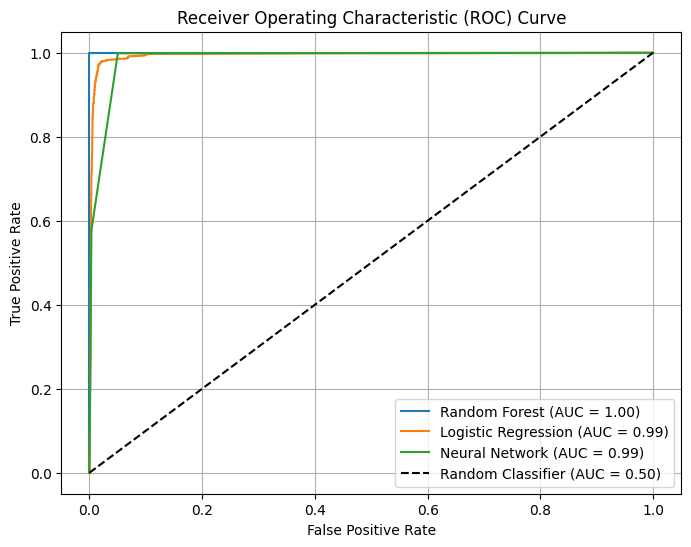

In [ ]:
# Plot ROC curves for all models
plt.figure(figsize=(8, 6))
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.2f})')
plt.plot(lr_fpr, lr_tpr, label=f'Logistic Regression (AUC = {lr_auc:.2f})')
plt.plot(nn_fpr, nn_tpr, label=f'Neural Network (AUC = {nn_auc:.2f})')

# Plot ROC curve for random classifier (50% area)
plt.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random Classifier (AUC = 0.50)')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid()
plt.show()

In [ ]:
from sklearn.ensemble import VotingClassifier

# Create an ensemble of Random Forest, Logistic Regression, and Neural Network
ensemble_model = VotingClassifier(
    estimators=[
        ('rf', rf_model),
        ('lr', lr_model),
        ('nn', nn_model)
    ],
    voting='soft'  # 'soft' uses probability scores, 'hard' uses majority vote
)

# Train the ensemble model
ensemble_model.fit(X_train, y_train)

# Make predictions
ensemble_pred = ensemble_model.predict(X_test)
ensemble_proba = ensemble_model.predict_proba(X_test)[:, 1]  # For ROC Curve


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
# Calculate performance metrics
ensemble_accuracy = accuracy_score(y_test, ensemble_pred)
ensemble_f1 = f1_score(y_test, ensemble_pred)
ensemble_precision = precision_score(y_test, ensemble_pred)
ensemble_recall = recall_score(y_test, ensemble_pred)

print('\nEnsemble Model Metrics:')
print(f'Accuracy: {ensemble_accuracy:.4f}')
print(f'F1 Score: {ensemble_f1:.4f}')
print(f'Precision: {ensemble_precision:.4f}')
print(f'Recall: {ensemble_recall:.4f}')



Ensemble Model Metrics:
Accuracy: 0.9963
F1 Score: 0.9955
Precision: 0.9916
Recall: 0.9993


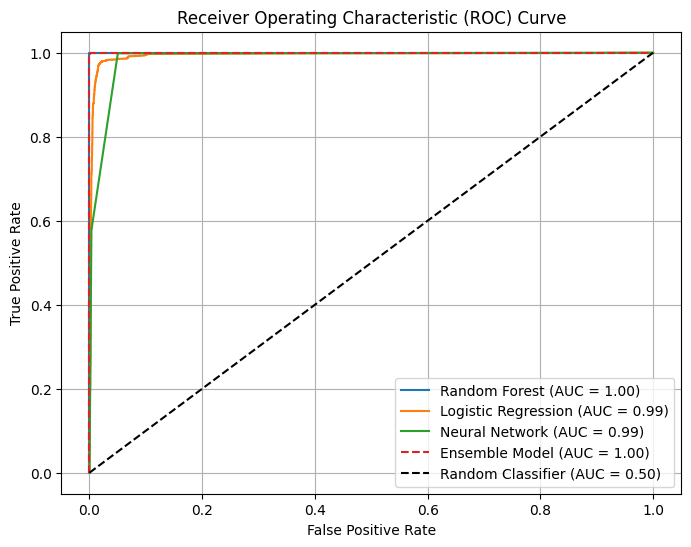

In [ ]:
# Compute ROC Curve for Ensemble Model
ensemble_fpr, ensemble_tpr, _ = roc_curve(y_test, ensemble_proba)
ensemble_auc = auc(ensemble_fpr, ensemble_tpr)

# Plot ROC Curves for all models
plt.figure(figsize=(8, 6))
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.2f})')
plt.plot(lr_fpr, lr_tpr, label=f'Logistic Regression (AUC = {lr_auc:.2f})')
plt.plot(nn_fpr, nn_tpr, label=f'Neural Network (AUC = {nn_auc:.2f})')
plt.plot(ensemble_fpr, ensemble_tpr, label=f'Ensemble Model (AUC = {ensemble_auc:.2f})', linestyle='dashed')

plt.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random Classifier (AUC = 0.50)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid()
plt.show()
